Introduction text





In [1]:
import pandas as pd

# Read in the csv file
weather_table = pd.read_csv("weather.csv")
weather_table.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


<b>After the raw dataset has been loaded into a dataframe, we can see 15 different columns of data. Most of these are <br>
self explanatory, but some aren't. To better understand the columns, let's explain each of them:<br>
<br>
station: This is the name of the weather station that the data originates from<br>
state: which state of the United States the station exists in. This includes U.S. territories<br>
latitude: the geographical latitude of the station<br>
longitude: the geographical longitude of the station<br>
elevation: the geographical elevation of the station<br>
date: the date that a given recording is made<br>
TMIN: the minumum temperature for the given date<br>
TMAX: the maximum temperature for a given date<br>
TAVG: the average temperature for a given date<br>
AWND: the average daily wind speed (measured in tenths of a meter per second)<br>
WDF5: the direction of the fastest 5-second wind (measured in degrees)<br>
WSF5: the fastest 5-second wind speed (measured in tenths of a meter per second)<br>
SNOW = the amount of snow fall for a given date<br>
SNWD = the amount of snow depth for a given date<br>
PRCP = the amount of preciptation for a given date<br>
<br>
Not all of these columns will be useful in our analysis, so they'll get dropped.<br>
<br></b>

In [2]:
# Remove unnecessary data
weather_table.drop(['station', 'state', 'TAVG', 'WDF5', 'WSF5', 'SNOW'], axis = 1, inplace = True)
weather_table.head()

,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP
0,13.4836,144.7961,77.4,20170312,71.06,87.08,4.473880,0.0,0.0
1,18.2550,-65.6408,10.1,20170404,77.00,86.00,8.947760,NaN,0.0
2,18.2550,-65.6408,10.1,20170420,NaN,NaN,8.500372,NaN,0.0
3,18.4325,-66.0108,2.7,20170120,69.08,82.04,3.355410,0.0,0.0
4,18.4325,-66.0108,2.7,20170217,73.04,87.08,4.697574,0.0,0.0


<b><br><br>
Next, to get a sense of what data we have (or don't have), we check for nulls <br>
within each column.<br><br></b>

In [3]:
# Check for null values [category : quantity of nulls]
print(weather_table.isnull().sum())
print(len(weather_table.index))

latitude          0
longitude         0
elevation         0
date              0
TMIN           1344
TMAX           1273
AWND         182057
SNWD         104495
PRCP           1972
dtype: int64
416937


<b><br><br><br>Columns AWND and SNWD seem to have a lot of nulls. TMIN, TMAX, and PRCP contain<br>
null values as well. To combat this, rows<br>
with null values are dropped and the index for the dataframe is reset.<br><br><br></b>

In [4]:
# Drop rows with null values
weather_table = weather_table.dropna()
weather_table.reset_index(drop = True, inplace=True)
print(weather_table.isnull().sum())
print(len(weather_table.index))

latitude     0
longitude    0
elevation    0
date         0
TMIN         0
TMAX         0
AWND         0
SNWD         0
PRCP         0
dtype: int64
136088


<b><br><br>Alright, now we've got a beautiful dataset free of null values and unnecessary data columns.<br>
To further pretty up the dataframe, longitudinal values are cast as whole integers<br>
and sorted from least to greatest.<br><br></b>

In [5]:
# Round longitudinal values, sort more longitudinal value
weather_table.longitude = weather_table.longitude.round(decimals=0)
weather_table.longitude = weather_table.longitude.astype(int)
weather_table = weather_table.sort_values(by=['longitude'])
weather_table

,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP
42151,57.1553,-170,10.7,20170128,16.16,29.12,14.987498,18.110246,0.098425
8235,57.1553,-170,10.7,20170404,19.22,24.26,17.224438,0.000000,0.000000
8236,57.1553,-170,10.7,20170419,29.12,35.96,17.224438,0.000000,0.000000
57886,57.1553,-170,10.7,20170226,30.20,37.04,12.303170,0.000000,0.200788
103944,57.1553,-170,10.7,20170303,26.24,31.10,13.197946,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
109091,15.1167,146,65.5,20170127,73.94,84.02,19.461378,0.000000,0.110236
109092,15.1167,146,65.5,20170130,75.02,84.92,16.329662,0.000000,0.129921
109093,15.1167,146,65.5,20170131,77.00,84.92,16.105968,0.000000,0.011811
109086,15.1167,146,65.5,20170108,73.94,82.04,17.000744,0.000000,0.118110


<b><br><br>Since our predictice analysis relies heavily on longitunidal data records,
it's important to see which longitunidal values are available in our dataset<br><br></b>

In [6]:
print(weather_table['longitude'].unique())

[-170 -165 -163 -162 -159 -158 -157 -156 -155 -152 -150 -148 -145 -140
 -135 -132 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72
  -71  -70  -69  -68  -66  -65  145  146]


<b><br><br>
For the most part the longitunidal data looks great. The longitudinal values<br>
increment gradually, with the only major jump being from -65 to 145. The<br>
gradually incrementing data will work perfectly for developing a predictive analysis,<br>
but the major jump in the data might cause some problems. Since the longitudinal<br>
values >145 represents only a small subset of data in our dataset, it won't be a problem<br>
to simply drop those values.<br><br></b>

In [7]:
import math

# Dropping rows with values greater than 0
# Only includes about 500 rows with longitudes significantly different from the majority
# I didn't want the massive jump in longitude from -65 to 144 as it'd make the graphs looks weird
# Besides, longitudes from -65 through -170 is plenty
for index, row in weather_table.iterrows():
    if (weather_table.loc[index, 'longitude'] > 0):
        weather_table.drop(index, inplace=True)

<b><br><br>
Next, we're going to categorize the available longitudinal data into intervals of 5.<br>
This will be useful for further processing.
<br><br></b>

In [8]:
# Categorize longitudes by intervals of 5
B = [-65, -70, -75, -80, -85, -90, -95, -100, -105, -110, -115,\
     -120, -125, -130, -135, -140, -145, -150, -155, -160, -165, -171]
LI = ['-65  -  -70', '-70  -  -75', '-75  -  -80', '-80  -  -85', '-85  -  -90','-90  -  -95',\
      '-95  -  -100', '-100  -  -105', '-105  -  -110', '-110  -  -115', '-115  -  -120',\
      '-120  -  -125', '-125  -  -130', '-130  -  -135', '-135  -  -140', '-140  -  -145',\
      '-145  -  -150', '-150  -  -155', '-155  -  -160', '-160  -  -165', '-165  -  -170']
weather_table['longitudinal_interval'] = pd.cut(weather_table.longitude, bins = B[::-1], labels = LI[::-1])
weather_table

,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP,longitudinal_interval
42151,57.1553,-170,10.7,20170128,16.16,29.12,14.987498,18.110246,0.098425,-165 - -170
8235,57.1553,-170,10.7,20170404,19.22,24.26,17.224438,0.000000,0.000000,-165 - -170
8236,57.1553,-170,10.7,20170419,29.12,35.96,17.224438,0.000000,0.000000,-165 - -170
57886,57.1553,-170,10.7,20170226,30.20,37.04,12.303170,0.000000,0.200788,-165 - -170
103944,57.1553,-170,10.7,20170303,26.24,31.10,13.197946,0.000000,0.000000,-165 - -170
...,...,...,...,...,...,...,...,...,...,...
113443,17.7028,-65,18.6,20170414,73.04,84.92,4.921268,0.000000,0.000000,-65 - -70
113446,17.7028,-65,18.6,20170825,80.06,91.04,9.842536,0.000000,0.011811,-65 - -70
113447,17.7028,-65,18.6,20170827,77.00,89.06,8.276678,0.000000,0.039370,-65 - -70
118431,17.7028,-65,18.6,20170113,71.96,82.94,10.961006,0.000000,0.019685,-65 - -70


<b><br><br>
Now that the data is categorized, it's important to check that each interval<br>
to make sure that it contains a sufficient amount of data.
The reason for this is because if some intervals have certain months with records<br>
but others don't, those without might skew the data. For example, if one interval<br>
had date for all 4 seasons, but another interval only had data for summer,<br>
then interval with only summer would make the data appear as though<br>
the temperature is hotter than it would really be had it contained all 4 seasons.<br>
<br><br></b>

In [9]:

# Reformat the 'date' column
weather_table['date'] = pd.to_datetime(weather_table['date'], format = "%Y%m%d")

# Check for which months have recorded values in each longitudinal interval
for longitudinal_interval, interval in weather_table.groupby('longitudinal_interval'):
    months = interval['date'].dt.strftime("%m").unique().tolist()
    for month in months:
        months[months.index(month)] = int(month)
    months.sort()
    print("recorded months for longitudinal interval", longitudinal_interval, "are:", months)
# Surprisingly, they all have records for the same months 1-9 (January through September)
# but not for months 10-12 (October through December)

recorded months for longitudinal interval -165  -  -170 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -160  -  -165 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -155  -  -160 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -150  -  -155 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -145  -  -150 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -140  -  -145 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -135  -  -140 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -130  -  -135 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -125  -  -130 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -120  -  -125 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -115  -  -120 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for l

<b><br><br>Interestingly, each interval has data for months 1 through 9 (January through September).<br>
However, they're all missing data for months 10 through 12 (October through December).<br>
The important thing is that all intervals contain records for the same months, meaning we<br>
won't have to worry as much about data being skewed.<br>
    <br>
    Next, we'll want to calculate averages using TMIN and TMAX. While the data before<br>
    contained averages, the data was incomplete for many of the entries. Using<br>
    TMIN and TMAX to calculate the average, while not completely accurate, should suffice<br>
    for our data analysis.<br>
<br><br></b>

In [10]:
temp_avg = []
for index, row in weather_table.iterrows():
    avg = ((weather_table.loc[index, 'TMIN'] + weather_table.loc[index, 'TMAX']) / 2)
    temp_avg.append(avg)
weather_table['~TAVG'] = temp_avg
weather_table.head()

,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP,longitudinal_interval,~TAVG
42151,57.1553,-170,10.7,2017-01-28,16.16,29.12,14.987498,18.110246,0.098425,-165 - -170,22.64
8235,57.1553,-170,10.7,2017-04-04,19.22,24.26,17.224438,0.000000,0.000000,-165 - -170,21.74
8236,57.1553,-170,10.7,2017-04-19,29.12,35.96,17.224438,0.000000,0.000000,-165 - -170,32.54
57886,57.1553,-170,10.7,2017-02-26,30.20,37.04,12.303170,0.000000,0.200788,-165 - -170,33.62
103944,57.1553,-170,10.7,2017-03-03,26.24,31.10,13.197946,0.000000,0.000000,-165 - -170,28.67


In [11]:
weather_table['longitudinal_interval_avg'] = range(0, len(weather_table['longitude'].values))
weather_table['long_interval_avg_temp'] = range(0, len(weather_table['~TAVG'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_avg = interval['longitude'].sum()/(len(interval['longitude'].values))
    long_interval_avg_temp = interval['~TAVG'].sum()/(len(interval['~TAVG'].values))

    for index, row in interval.iterrows():                                          
        weather_table.loc[index, 'longitudinal_interval_avg'] = long_avg
        weather_table.loc[index, 'long_interval_avg_temp'] = long_interval_avg_temp

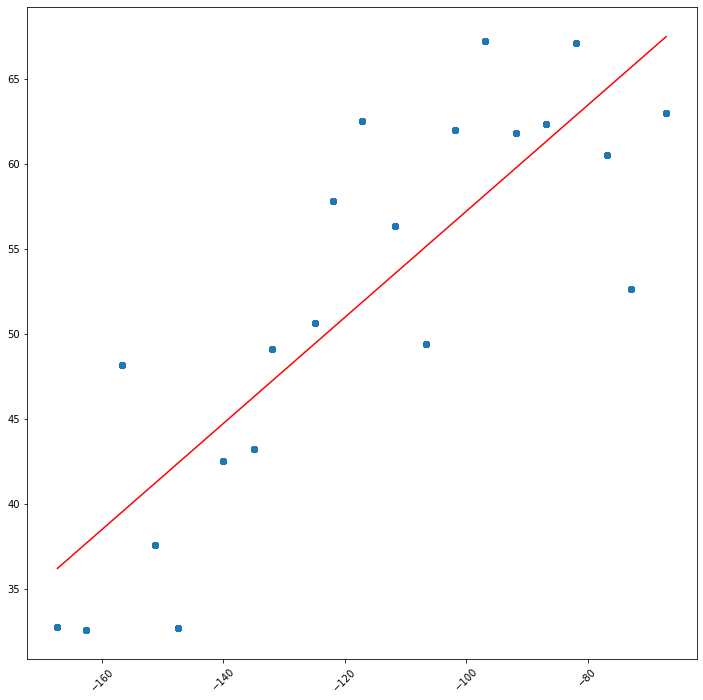

In [12]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,12))
x_axis = weather_table['longitudinal_interval_avg'].values
y_axis = weather_table['long_interval_avg_temp'].values
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

x = np.array(weather_table['longitudinal_interval_avg'].unique())
y = np.array(weather_table['long_interval_avg_temp'].unique())
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.show()

In [13]:

weather_table['long_interval_avg_precipitation'] = range(0, len(weather_table['PRCP'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_prec = interval['PRCP'].sum()/(len(interval['PRCP'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_precipitation'] = long_interval_avg_prec

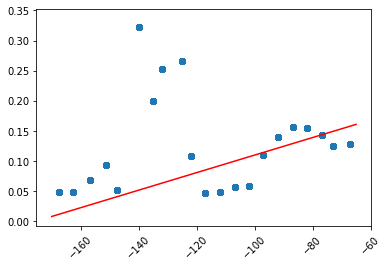

In [14]:
x_axis = weather_table['longitudinal_interval_avg'].values
y_axis = weather_table['long_interval_avg_precipitation'].values
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

x = np.array(weather_table['longitude'])
y = np.array(weather_table['PRCP'])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.show()

In [15]:

weather_table['long_interval_avg_windspeed'] = range(0, len(weather_table['AWND'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_ws = interval['AWND'].sum()/(len(interval['AWND'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_windspeed'] = long_interval_avg_ws

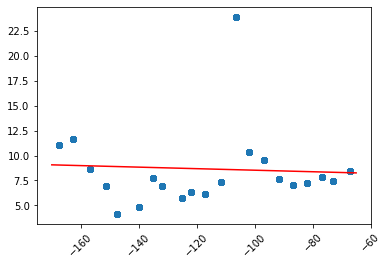

In [16]:
x_axis = weather_table['longitudinal_interval_avg'].values
y_axis = weather_table['long_interval_avg_windspeed'].values
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

x = np.array(weather_table['longitude'])
y = np.array(weather_table['AWND'])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.show()

In [17]:

weather_table['long_interval_avg_snowdepth'] = range(0, len(weather_table['SNWD'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_sd = interval['SNWD'].sum()/(len(interval['SNWD'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_snowdepth'] = long_interval_avg_sd

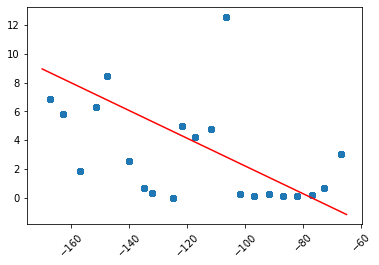

In [18]:
x_axis = weather_table['longitudinal_interval_avg'].values
y_axis = weather_table['long_interval_avg_snowdepth'].values
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

x = np.array(weather_table['longitude'])
y = np.array(weather_table['SNWD'])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.show()

In [23]:
weather_table['long_interval_avg_elevation'] = range(0, len(weather_table['elevation'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_elevation = interval['elevation'].sum()/(len(interval['elevation'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_elevation'] = long_interval_avg_elevation

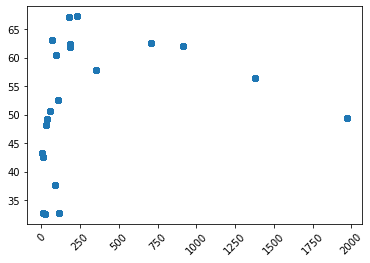

In [24]:
x_axis = weather_table['long_interval_avg_elevation'].values
y_axis = weather_table['long_interval_avg_temp'].values
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

# x = np.array(weather_table['elevation'])
# y = np.array(weather_table['~TAVG'])
# m, b = np.polyfit(x, y , 1)
# plt.plot(x, m*x + b, color='r')

plt.show()

In [20]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# X = weather_table['longitudinal_interval_avg'].values
# Y = weather_table['elevation'].values
# Z = weather_table['long_interval_avg_temp'].values

# ax.scatter(X, Y, Z)
# ax.set_xlabel('longitude')
# ax.set_ylabel('elevation')
# ax.set_zlabel('temperature')

# plt.show()